## Flight Company
## - - - - - - - - - - - - -

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

### Data Ingestion

In [2]:
data = pd.read_csv(r"D:\Data Analysis With Python Projects\Flight\Files\flights.csv", parse_dates = ["date"])

### Data Overview 

In [3]:
data.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10


In [4]:
data.tail()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,2020-07-12
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,2020-07-16
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,2020-07-20
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,2020-07-23
271887,135943,1339,Rio de Janeiro (RJ),Florianopolis (SC),economic,533.69,1.21,466.30,CloudFy,2020-07-26


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   travelCode  271888 non-null  int64         
 1   userCode    271888 non-null  int64         
 2   from        271888 non-null  object        
 3   to          271888 non-null  object        
 4   flightType  271888 non-null  object        
 5   price       271888 non-null  float64       
 6   time        271888 non-null  float64       
 7   distance    271888 non-null  float64       
 8   agency      271888 non-null  object        
 9   date        271888 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 20.7+ MB


In [7]:
round(data["price"].describe())

count    271888.0
mean        957.0
std         362.0
min         302.0
25%         673.0
50%         904.0
75%        1222.0
max        1754.0
Name: price, dtype: float64

In [8]:
round(data["distance"].describe())

count    271888.0
mean        547.0
std         209.0
min         168.0
25%         402.0
50%         562.0
75%         677.0
max         938.0
Name: distance, dtype: float64

### Data Cleaning

In [12]:
data.sort_values(by = ["date", "distance", "price", "time"], ascending = [True, True, True, True])

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
110482,55241,540,Campo Grande (MS),Sao Paulo (SP),economic,375.51,0.44,168.22,CloudFy,2019-09-26
117320,58660,572,Campo Grande (MS),Sao Paulo (SP),economic,375.51,0.44,168.22,CloudFy,2019-09-26
132774,66387,645,Campo Grande (MS),Sao Paulo (SP),economic,375.51,0.44,168.22,CloudFy,2019-09-26
105606,52803,512,Campo Grande (MS),Sao Paulo (SP),economic,381.83,0.44,168.22,Rainbow,2019-09-26
107510,53755,520,Campo Grande (MS),Sao Paulo (SP),economic,381.83,0.44,168.22,Rainbow,2019-09-26
...,...,...,...,...,...,...,...,...,...,...
86565,43282,422,Rio de Janeiro (RJ),Aracaju (SE),firstClass,1381.55,1.55,597.61,FlyingDrops,2023-07-21
219941,109970,1089,Salvador (BH),Florianopolis (SC),firstClass,1654.09,2.44,937.77,Rainbow,2023-07-21
187725,93862,925,Salvador (BH),Florianopolis (SC),firstClass,1616.44,2.44,937.77,FlyingDrops,2023-07-23
80831,40415,389,Campo Grande (MS),Brasilia (DF),economic,517.82,0.72,277.70,Rainbow,2023-07-24


## Data Exploration

### Q / Number Of Flights Per Year

####  Year | 2019 = 35826 Flight

In [13]:
year_2019 = (data["date"] >= "2019/1/1") & (data["date"] <= "2019/12/31")

In [14]:
df_2019 = data.loc[year_2019]

In [15]:
df_2019.sort_values(by = "date", ascending = True)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26
228550,114275,1138,Florianopolis (SC),Brasilia (DF),firstClass,1097.17,1.66,637.56,FlyingDrops,2019-09-26
61482,30741,293,Recife (PE),Sao Paulo (SP),economic,545.95,1.26,486.52,Rainbow,2019-09-26
228466,114233,1137,Florianopolis (SC),Brasilia (DF),premium,885.37,1.66,637.56,CloudFy,2019-09-26
61636,30818,294,Aracaju (SE),Sao Paulo (SP),economic,446.73,1.02,392.76,Rainbow,2019-09-26
...,...,...,...,...,...,...,...,...,...,...
110109,55054,538,Brasilia (DF),Campo Grande (MS),firstClass,1096.58,0.72,277.70,CloudFy,2019-12-30
43859,21929,214,Campo Grande (MS),Aracaju (SE),economic,886.90,1.69,650.10,CloudFy,2019-12-30
109709,54854,535,Salvador (BH),Campo Grande (MS),firstClass,980.40,1.36,522.34,FlyingDrops,2019-12-30
240049,120024,1191,Rio de Janeiro (RJ),Florianopolis (SC),economic,533.69,1.21,466.30,CloudFy,2019-12-30


In [20]:
df_2019["date"].count()

35826

####  Year | 2020 = 112571 Flight

In [21]:
year_2020 = (data["date"] >= "2020/1/1") & (data["date"] <= "2020/12/31")

In [22]:
df_2020 = data.loc[year_2020]

In [23]:
df_2020.sort_values(by = "date", ascending = True)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
28,14,0,Brasilia (DF),Sao Paulo (SP),firstClass,893.65,0.67,257.81,CloudFy,2020-01-02
222762,111381,1104,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2020-01-02
45242,22621,221,Recife (PE),Natal (RN),premium,488.73,0.58,222.67,Rainbow,2020-01-02
45306,22653,222,Aracaju (SE),Campo Grande (MS),firstClass,1389.37,1.69,650.10,CloudFy,2020-01-02
222488,111244,1103,Florianopolis (SC),Recife (PE),economic,674.52,1.76,676.53,CloudFy,2020-01-02
...,...,...,...,...,...,...,...,...,...,...
211772,105886,1049,Florianopolis (SC),Aracaju (SE),firstClass,1582.10,2.10,808.85,Rainbow,2020-12-31
55038,27519,264,Aracaju (SE),Sao Paulo (SP),premium,588.14,1.02,392.76,Rainbow,2020-12-31
98582,49291,483,Campo Grande (MS),Brasilia (DF),firstClass,949.99,0.72,277.70,CloudFy,2020-12-31
132760,66380,643,Campo Grande (MS),Rio de Janeiro (RJ),premium,1363.27,2.09,806.48,CloudFy,2020-12-31


In [24]:
df_2020["date"].count()

112571

####  Year | 2021 = 75363 Flight

In [25]:
year_2021 = (data["date"] >= "2021/1/1") & (data["date"] <= "2021/12/31")

In [26]:
df_2021 = data.loc[year_2021]

In [27]:
df_2021.sort_values(by = "date", ascending = True)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
13171,6585,64,Florianopolis (SC),Brasilia (DF),economic,636.51,1.66,637.56,CloudFy,2021-01-01
125951,62975,613,Natal (RN),Campo Grande (MS),premium,748.52,0.65,250.68,CloudFy,2021-01-01
125289,62644,611,Sao Paulo (SP),Campo Grande (MS),economic,367.22,0.44,168.22,Rainbow,2021-01-01
123853,61926,604,Aracaju (SE),Campo Grande (MS),premium,1116.83,1.69,650.10,Rainbow,2021-01-01
246875,123437,1222,Aracaju (SE),Florianopolis (SC),firstClass,1582.41,2.10,808.85,Rainbow,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
114507,57253,557,Rio de Janeiro (RJ),Campo Grande (MS),firstClass,1512.09,2.09,806.48,CloudFy,2021-12-31
39275,19637,191,Aracaju (SE),Brasilia (DF),firstClass,898.04,1.11,425.98,FlyingDrops,2021-12-31
151479,75739,737,Natal (RN),Sao Paulo (SP),premium,863.80,0.85,327.55,CloudFy,2021-12-31
16845,8422,82,Natal (RN),Aracaju (SE),firstClass,611.40,0.46,176.33,Rainbow,2021-12-31


In [28]:
df_2021["date"].count()

75363

####  Year | 2022 = 41761 Flight

In [29]:
year_2022 = (data["date"] >= "2022/1/1") & (data["date"] <= "2022/12/31")

In [30]:
df_2022 = data.loc[year_2022]

In [31]:
df_2022.sort_values(by = "date", ascending = True)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
67401,33700,323,Salvador (BH),Recife (PE),firstClass,1348.04,2.05,788.55,FlyingDrops,2022-01-01
256037,128018,1261,Natal (RN),Florianopolis (SC),economic,884.40,1.84,709.37,Rainbow,2022-01-01
153665,76832,746,Recife (PE),Aracaju (SE),premium,932.22,1.44,555.74,Rainbow,2022-01-01
171383,85691,843,Recife (PE),Aracaju (SE),firstClass,1166.10,1.44,555.74,CloudFy,2022-01-01
66693,33346,321,Campo Grande (MS),Brasilia (DF),premium,691.99,0.72,277.70,Rainbow,2022-01-01
...,...,...,...,...,...,...,...,...,...,...
218073,109036,1080,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2022-12-31
91733,45866,447,Salvador (BH),Brasilia (DF),economic,609.83,1.76,676.56,Rainbow,2022-12-31
182685,91342,900,Salvador (BH),Florianopolis (SC),economic,943.15,2.44,937.77,CloudFy,2022-12-31
26517,13258,129,Campo Grande (MS),Brasilia (DF),economic,506.56,0.72,277.70,CloudFy,2022-12-31


In [32]:
df_2022["date"].count()

41761

####  Year | 2023 = 6367 Flight

In [33]:
year_2023 = (data["date"] >= "2023/1/1") & (data["date"] <= "2023/12/31")

In [34]:
df_2023 = data.loc[year_2023]

In [35]:
df_2023.sort_values(by = "date", ascending = True)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
188693,94346,931,Aracaju (SE),Florianopolis (SC),premium,1132.81,2.10,808.85,Rainbow,2023-01-01
205425,102712,1019,Salvador (BH),Florianopolis (SC),economic,899.60,2.44,937.77,Rainbow,2023-01-01
18581,9290,93,Aracaju (SE),Brasilia (DF),premium,706.36,1.11,425.98,Rainbow,2023-01-01
233115,116557,1155,Brasilia (DF),Florianopolis (SC),premium,1189.32,1.66,637.56,CloudFy,2023-01-01
141357,70678,684,Aracaju (SE),Natal (RN),firstClass,549.96,0.46,176.33,Rainbow,2023-01-01
...,...,...,...,...,...,...,...,...,...,...
67163,33581,322,Recife (PE),Aracaju (SE),firstClass,1166.10,1.44,555.74,CloudFy,2023-07-21
206933,103466,1026,Campo Grande (MS),Florianopolis (SC),premium,1030.13,1.49,573.81,Rainbow,2023-07-21
187725,93862,925,Salvador (BH),Florianopolis (SC),firstClass,1616.44,2.44,937.77,FlyingDrops,2023-07-23
117319,58659,571,Recife (PE),Campo Grande (MS),premium,793.15,1.39,535.40,CloudFy,2023-07-24


In [36]:
df_2023["date"].count()

6367

In [37]:
years = [2019, 2020, 2021, 2022, 2023]
num_of_flights = [35826, 112571, 75363, 41761, 6367]

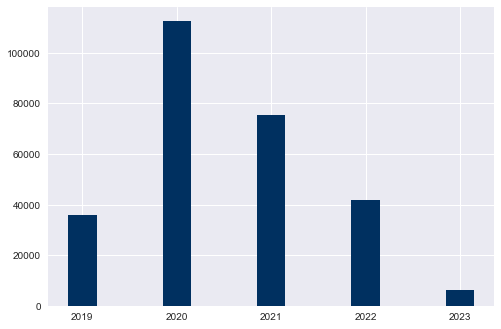

In [47]:
plt.style.use('seaborn')
plt.bar(years, num_of_flights, color = "#003060", width = .3)
plt.show()

### Q / Which Agency Book The Most Flights ?
#### The Most Flights Booking By | Rainbow Agency

In [48]:
data["agency"].unique()

array(['FlyingDrops', 'CloudFy', 'Rainbow'], dtype=object)

In [50]:
data["agency"].value_counts().sort(ascending = False)

Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: agency, dtype: int64

In [51]:
agencies = ['FlyingDrops', 'CloudFy', 'Rainbow']
num_of_booking_flights = [38758, 116378, 116752]

In [54]:
np.max(num_of_booking_flights)

116752

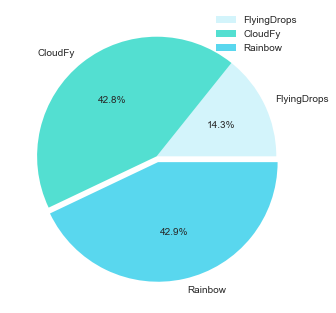

In [64]:
plt.style.use('seaborn')
colors = ["#D3F4FB", "#53DFD1", "#59D7EE"]
explode = [0, 0, 0.05]
plt.pie(num_of_booking_flights, data = data, colors = colors, labels = agencies, explode = explode, autopct = "%1.1f%%")
plt.legend()
plt.show()

### Q / Most Wanted Place To Travel !
#### The Most Travelled Place : Florianopolis (SC) | 57317

In [72]:
data["to"].value_counts().sort_values(ascending = False)

Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: to, dtype: int64

In [73]:
data["to"].unique()

array(['Florianopolis (SC)', 'Recife (PE)', 'Brasilia (DF)',
       'Salvador (BH)', 'Aracaju (SE)', 'Campo Grande (MS)',
       'Sao Paulo (SP)', 'Natal (RN)', 'Rio de Janeiro (RJ)'],
      dtype=object)

In [78]:
travel_to = ['Florianopolis (SC)', 'Recife (PE)', 'Brasilia (DF)',
       'Salvador (BH)', 'Aracaju (SE)', 'Campo Grande (MS)',
       'Sao Paulo (SP)', 'Natal (RN)', 'Rio de Janeiro (RJ)']
num_of_travel_to = [57317, 30480, 30779, 17104, 37224, 34748, 23625, 23796, 16815]

In [81]:
np.max(num_of_tarvel_to)

57317

In [82]:
travels_df = pd.DataFrame({"place": travel_to, "num" :num_of_travel_to})

In [83]:
travels_df

,place,num
0,Florianopolis (SC),57317
1,Recife (PE),30480
2,Brasilia (DF),30779
3,Salvador (BH),17104
4,Aracaju (SE),37224
5,Campo Grande (MS),34748
6,Sao Paulo (SP),23625
7,Natal (RN),23796
8,Rio de Janeiro (RJ),16815


In [84]:
travels_to = pd.DataFrame(columns = [travel_to, num_of_travel_to])

In [85]:
travels_to

,Florianopolis (SC),Recife (PE),Brasilia (DF),Salvador (BH),Aracaju (SE),Campo Grande (MS),Sao Paulo (SP),Natal (RN),Rio de Janeiro (RJ)
,57317,30480,30779,17104,37224,34748,23625,23796,16815


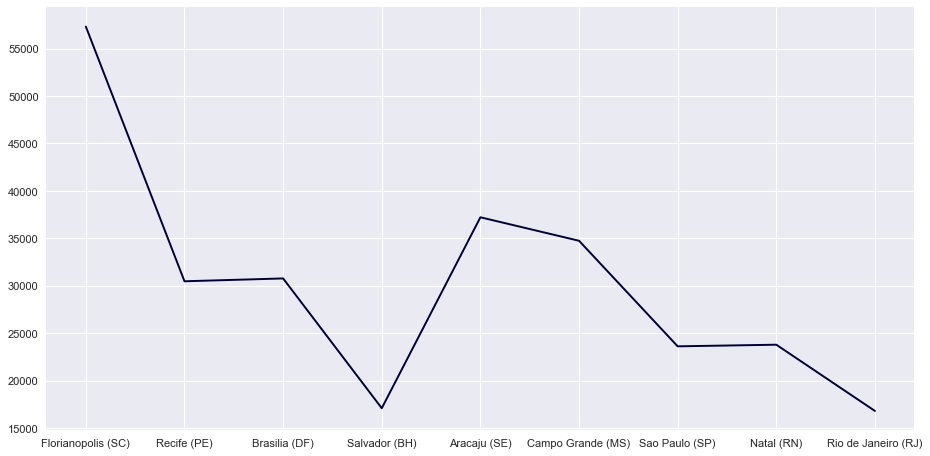

In [89]:
figure(figsize = (14, 7), dpi = 80)
ax = sns.lineplot(data = travels_df, x = "place", y = "num", color = "#000033")
ax.set(xlabel = None)
ax.set(ylabel = None)
plt.show()

### Q / Is The Largest Number Of Flights In The Economic Class ?
#### The First Class Has The Largest Number Of Flights | 116418
#### The Economic Class Has The Smallest Number Of Flights | 77466

In [90]:
data["flightType"].value_counts()

firstClass    116418
premium        78004
economic       77466
Name: flightType, dtype: int64

In [91]:
flight_classes = ["First Class", "Premium", "Economic"]
num_of_flight_classes = [116418, 78004, 77466]

In [92]:
np.max(num_of_flight_classes)

116418

In [93]:
classes_df = pd.DataFrame({"Class" : flight_classes, "Number" : num_of_flight_classes})

In [94]:
classes_df

,Class,Number
0,First Class,116418
1,Premium,78004
2,Economic,77466


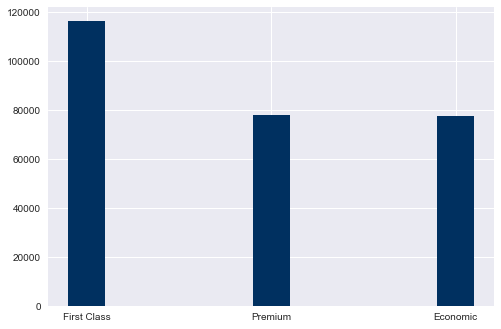

In [101]:
plt.style.use('seaborn')
plt.bar(flight_classes, num_of_flight_classes, color = "#003060", width = .2)
plt.show()

### Q / Total Booking Costs Per Each Year 

#### - Year 2019 | 34124281.03

In [116]:
y19 = df_2019["price"].sum()

#### - Year 2020 | 107699984.05

In [117]:
y20 = df_2020["price"].sum()

#### - Year 2021 | 72137653.69

In [118]:
y21 = df_2021["price"].sum()

#### - Year 2022 | 40219584.97

In [119]:
y22 = df_2022["price"].sum()

#### - Year 2023 | 6117278.4

In [120]:
y23 = df_2023["price"].sum()

In [128]:
years = [2019, 2020, 2021, 2022, 2023]
booking_costs = [y19, y20, y21, y22, y23]

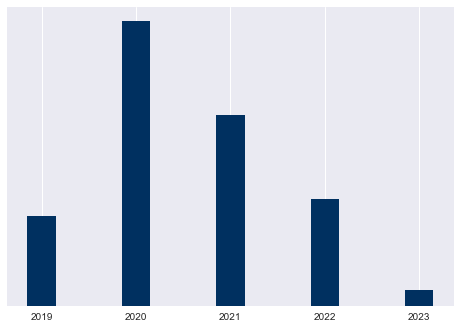

In [138]:
plt.style.use('seaborn')
plt.bar(years, booking_costs, color = "#003060", width = .3)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.show()

## THANK YOU